In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import locale


locale.setlocale(locale.LC_TIME, 'pt_BR.UTF-8')

'pt_BR.UTF-8'

In [72]:
df = pd.read_csv('data/df_analise.csv').set_index('Data')
df.index = pd.to_datetime(df.index, format='%b/%Y')

In [73]:
df

,Dolar,IBOVESPA,IPCA,IGPM,IGPDI,IGP10,INPC
Data,,,,,,,
2010-02-01,-3.572001,1.683435,0.78,1.18,1.09,1.08,0.70
2010-03-01,-1.411957,5.817783,0.52,0.94,0.63,1.10,0.71
2010-04-01,-2.909296,-4.038538,0.57,0.77,0.72,0.63,0.73
2010-05-01,4.957478,-6.638531,0.43,1.19,1.57,1.11,0.43
2010-06-01,-1.295192,-3.348296,0.00,0.85,0.34,1.30,-0.11
...,...,...,...,...,...,...,...
2024-08-01,0.295836,6.542788,-0.02,0.29,0.12,0.72,-0.14
2024-09-01,-3.456118,-3.079321,0.44,0.62,1.03,0.18,0.48
2024-10-01,6.057206,-1.595406,0.56,1.52,1.54,1.34,0.61


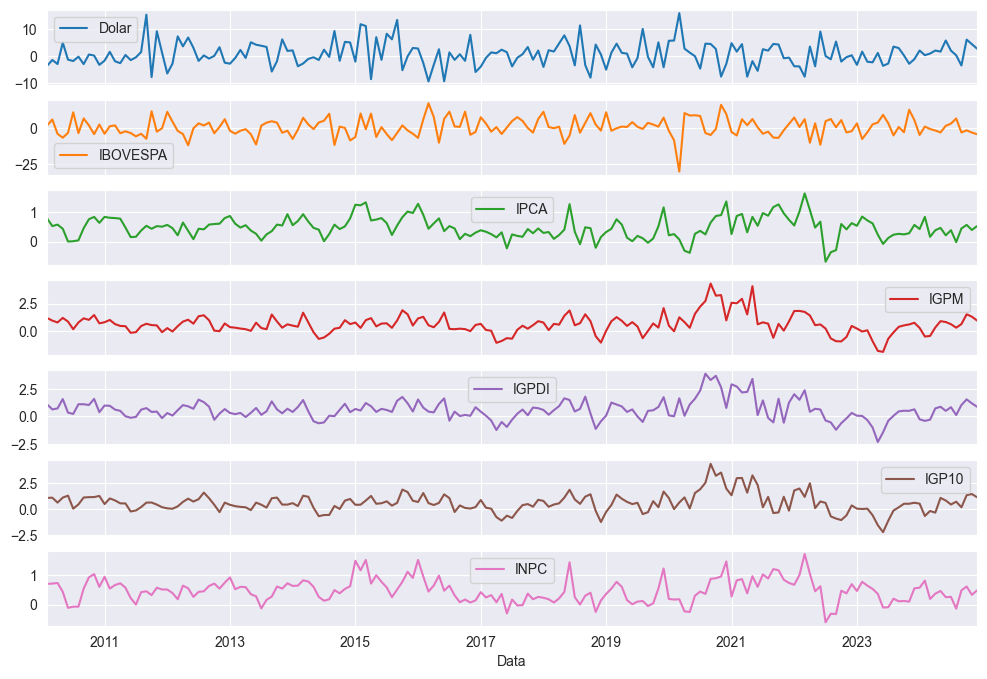

In [74]:
df.plot(subplots=True, figsize=(12, 8))
plt.show()

In [75]:
from statsmodels.tsa.stattools import adfuller, grangercausalitytests

for col in df.columns:
    result = adfuller(df[col], regression='c')
    print(f"{col}: p-value = {result[1]:.4f}")

Dolar: p-value = 0.0000
IBOVESPA: p-value = 0.0000
IPCA: p-value = 0.0000
IGPM: p-value = 0.0000
IGPDI: p-value = 0.0039
IGP10: p-value = 0.0084
INPC: p-value = 0.0000


In [76]:
from statsmodels.tsa.api import VAR

model = VAR(df)
lag_results = model.select_order(maxlags=12)
print(lag_results.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -5.644      -5.513    0.003540      -5.590
1       -10.03     -8.986*   4.402e-05     -9.607*
2       -10.21      -8.250   3.691e-05      -9.415
3      -10.31*      -7.435  3.365e-05*      -9.143
4       -10.24      -6.454   3.647e-05      -8.706
5       -10.13      -5.422   4.196e-05      -8.217
6       -9.971      -4.351   5.076e-05      -7.690
7       -9.895      -3.361   5.755e-05      -7.243
8       -9.809      -2.359   6.713e-05      -6.785
9       -10.04      -1.676   5.817e-05      -6.646
10      -10.09     -0.8094   6.219e-05      -6.322
11      -9.981      0.2133   8.016e-05      -5.843
12      -9.949       1.160   9.946e-05      -5.440
--------------------------------------------------


D:\anaconda3\envs\tcc\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [77]:
df

,Dolar,IBOVESPA,IPCA,IGPM,IGPDI,IGP10,INPC
Data,,,,,,,
2010-02-01,-3.572001,1.683435,0.78,1.18,1.09,1.08,0.70
2010-03-01,-1.411957,5.817783,0.52,0.94,0.63,1.10,0.71
2010-04-01,-2.909296,-4.038538,0.57,0.77,0.72,0.63,0.73
2010-05-01,4.957478,-6.638531,0.43,1.19,1.57,1.11,0.43
2010-06-01,-1.295192,-3.348296,0.00,0.85,0.34,1.30,-0.11
...,...,...,...,...,...,...,...
2024-08-01,0.295836,6.542788,-0.02,0.29,0.12,0.72,-0.14
2024-09-01,-3.456118,-3.079321,0.44,0.62,1.03,0.18,0.48
2024-10-01,6.057206,-1.595406,0.56,1.52,1.54,1.34,0.61


In [78]:
from statsmodels.tsa.api import VAR

model = VAR(df)  # Include all your variables
var_results = model.fit(maxlags=6)     # Use lag=1
print(var_results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           seg, 28, abr, 2025
Time:                     22:15:39
--------------------------------------------------------------------
No. of Equations:         7.00000    BIC:                   -4.58098
Nobs:                     173.000    HQIC:                  -7.84155
Log likelihood:          -546.510    FPE:                4.57235e-05
AIC:                     -10.0673    Det(Omega_mle):     9.66686e-06
--------------------------------------------------------------------
Results for equation Dolar
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               1.030518         1.083415            0.951           0.342
L1.Dolar           -0.084333         0.111095           -0.759           0.448
L1.IBOVESPA        -0.114508         0.084535           -1.355      

D:\anaconda3\envs\tcc\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


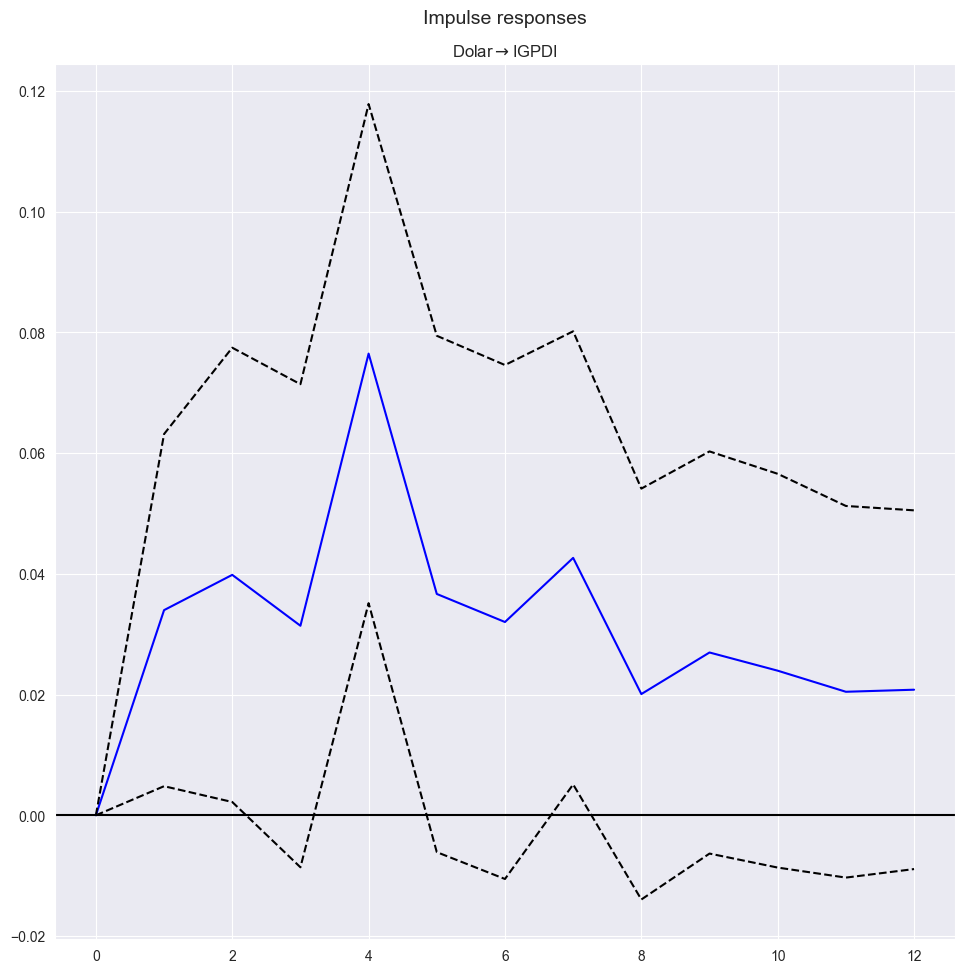

In [79]:
import matplotlib.pyplot as plt

irf = var_results.irf(periods=12)
irf.plot(impulse='Dolar', response='IGPDI')
plt.show()

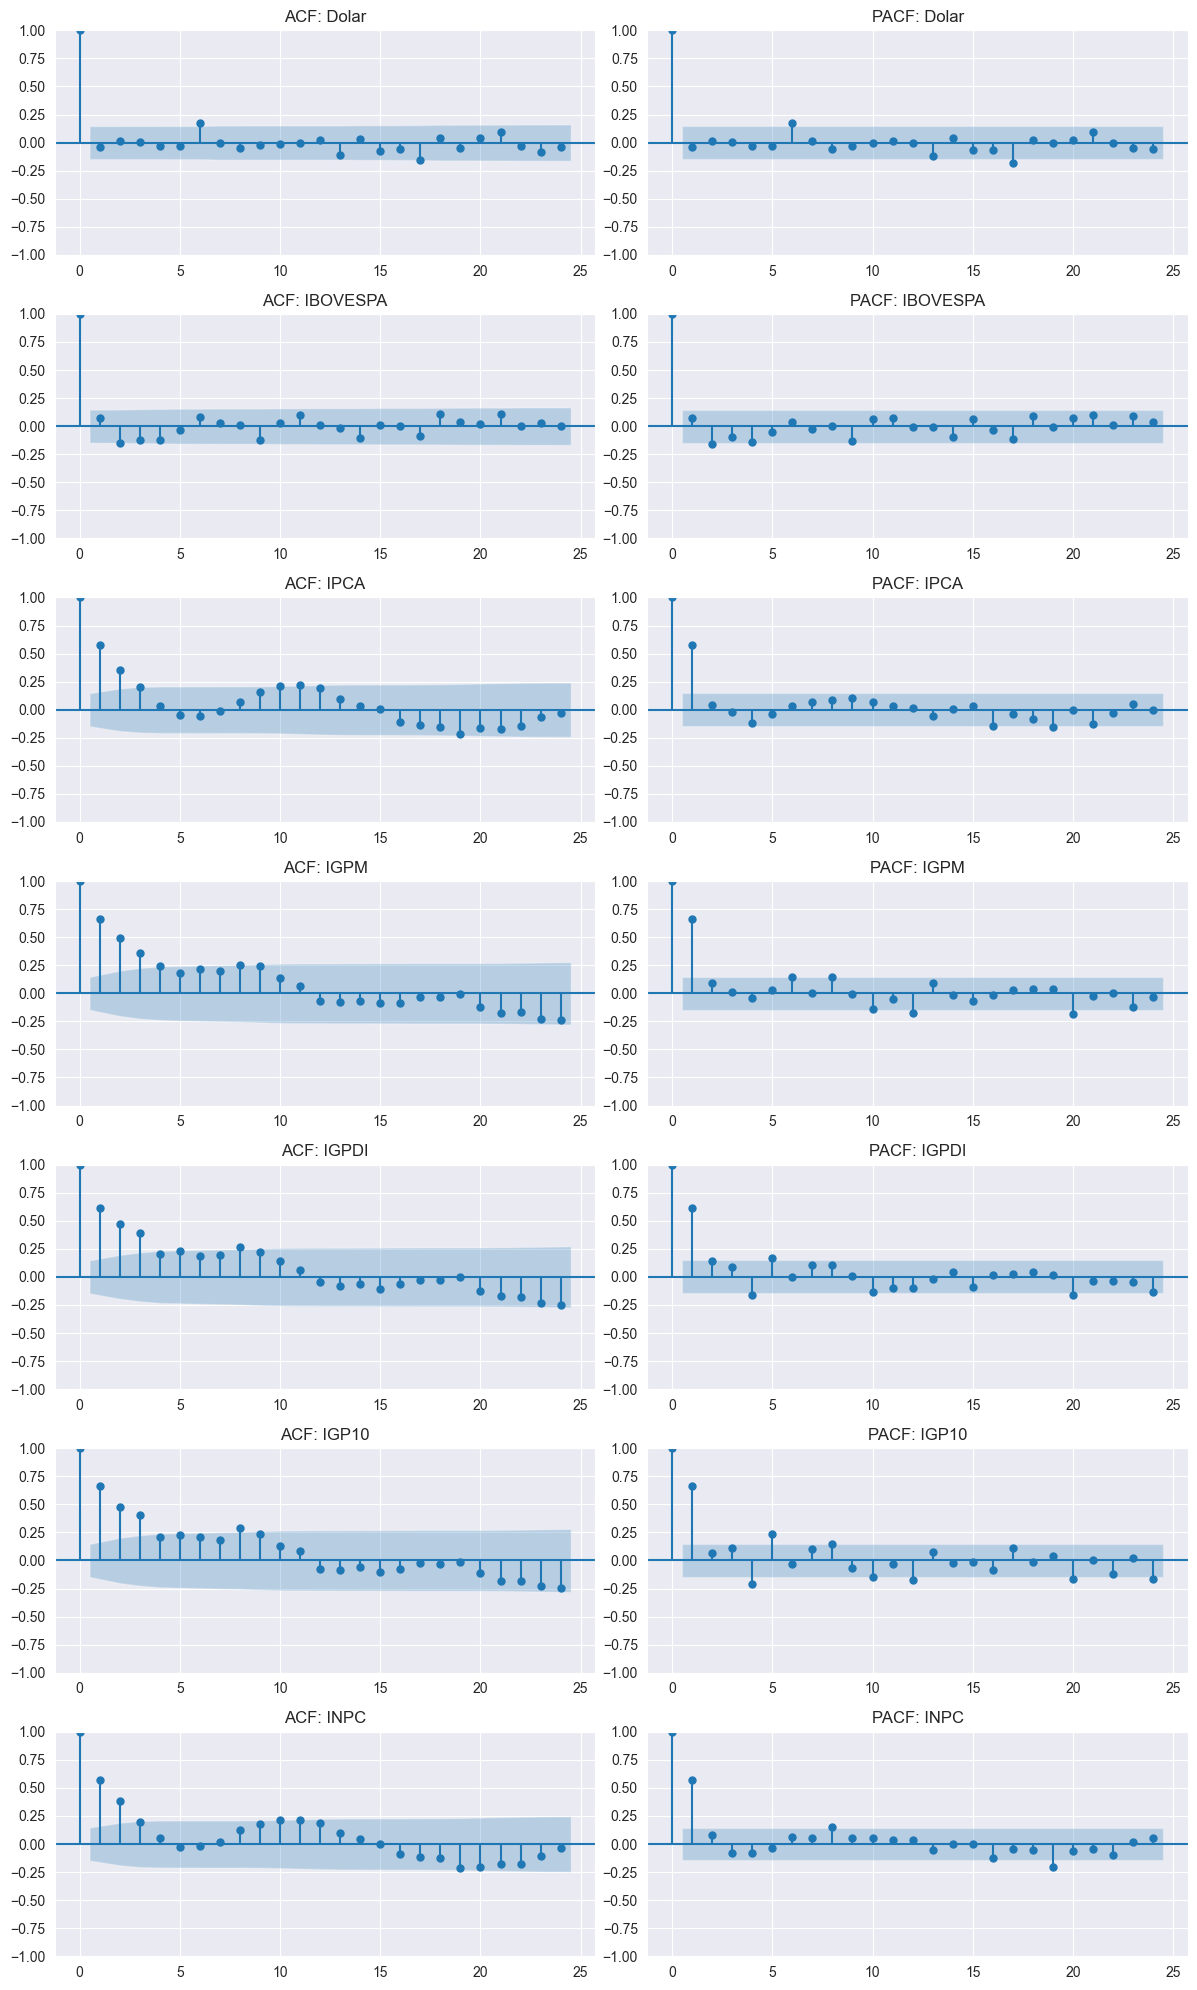

In [80]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

fig, axes = plt.subplots(len(df.columns), 2, figsize=(12, 20))

lag = 24
for idx, col in enumerate(df.columns):
    plot_acf(df[col], ax=axes[idx, 0], lags=lag, title=f'ACF: {col}')
    plot_pacf(df[col], ax=axes[idx, 1], lags=lag, title=f'PACF: {col}')

plt.tight_layout()
plt.show()

In [81]:
from statsmodels.tsa.stattools import adfuller

stationarity_results = {}
for col in df.columns:
    result = adfuller(df[col], autolag='AIC')
    stationarity_results[col] = {'p-value': result[1], 'Stationary': result[1] < 0.05}

stationarity_results

{'Dolar': {'p-value': np.float64(9.238283636850272e-26),
  'Stationary': np.True_},
 'IBOVESPA': {'p-value': np.float64(1.1237646779356164e-13),
  'Stationary': np.True_},
 'IPCA': {'p-value': np.float64(1.0705243257919868e-09),
  'Stationary': np.True_},
 'IGPM': {'p-value': np.float64(2.0509581883720189e-07),
  'Stationary': np.True_},
 'IGPDI': {'p-value': np.float64(0.003895006621687603),
  'Stationary': np.True_},
 'IGP10': {'p-value': np.float64(0.008437440503518318),
  'Stationary': np.True_},
 'INPC': {'p-value': np.float64(1.1223372006225794e-09),
  'Stationary': np.True_}}

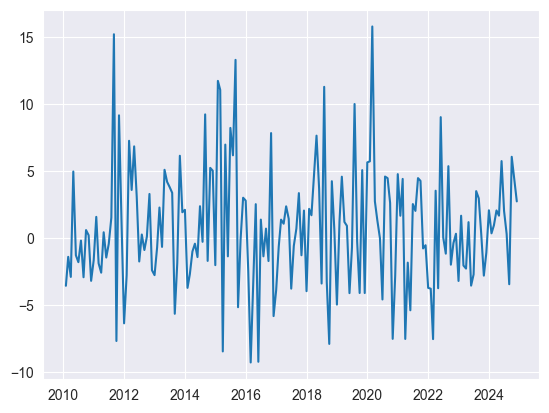

In [82]:
plt.plot(df['Dolar'])

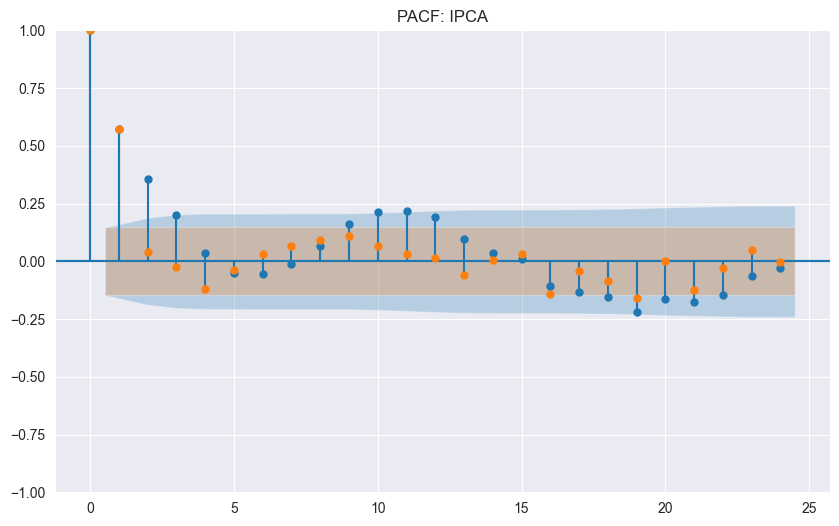

In [83]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
plot_acf(df['IPCA'], ax=ax, lags=24, title='ACF: IPCA')
plot_pacf(df['IPCA'], ax=ax, lags=24, title='PACF: IPCA')
plt.show()

In [84]:
df

,Dolar,IBOVESPA,IPCA,IGPM,IGPDI,IGP10,INPC
Data,,,,,,,
2010-02-01,-3.572001,1.683435,0.78,1.18,1.09,1.08,0.70
2010-03-01,-1.411957,5.817783,0.52,0.94,0.63,1.10,0.71
2010-04-01,-2.909296,-4.038538,0.57,0.77,0.72,0.63,0.73
2010-05-01,4.957478,-6.638531,0.43,1.19,1.57,1.11,0.43
2010-06-01,-1.295192,-3.348296,0.00,0.85,0.34,1.30,-0.11
...,...,...,...,...,...,...,...
2024-08-01,0.295836,6.542788,-0.02,0.29,0.12,0.72,-0.14
2024-09-01,-3.456118,-3.079321,0.44,0.62,1.03,0.18,0.48
2024-10-01,6.057206,-1.595406,0.56,1.52,1.54,1.34,0.61


In [85]:
df = df.asfreq(pd.infer_freq(df.index))

In [86]:
train_end = pd.to_datetime('2019-12-01')
test_start = pd.to_datetime('2020-01-01')

train_data = df.loc[:train_end]
test_data = df.loc[test_start:]

In [87]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train_data['IPCA'], order=(3, 0, 0))

In [88]:
model_fit = model.fit()

In [89]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   IPCA   No. Observations:                  119
Model:                 ARIMA(3, 0, 0)   Log Likelihood                  -3.601
Date:                seg, 28 abr 2025   AIC                             17.203
Time:                        22:15:41   BIC                             31.098
Sample:                    02-01-2010   HQIC                            22.845
                         - 12-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4842      0.064      7.563      0.000       0.359       0.610
ar.L1          0.6746      0.081      8.322      0.000       0.516       0.834
ar.L2         -0.1514      0.107     -1.416      0.157      -0.361       0.058
ar.L3          0.0941      0.095      0.990      0.322      -0.092       0.281
sigma2         0.0619      0.007      8.960      0.000       0.048       0.075
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 3.13
Prob(Q):                              0.88   Prob(JB):                         0.21
Heteroskedasticity (H):               2.67   Skew:                             0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [90]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [91]:
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data['IPCA'] - predictions

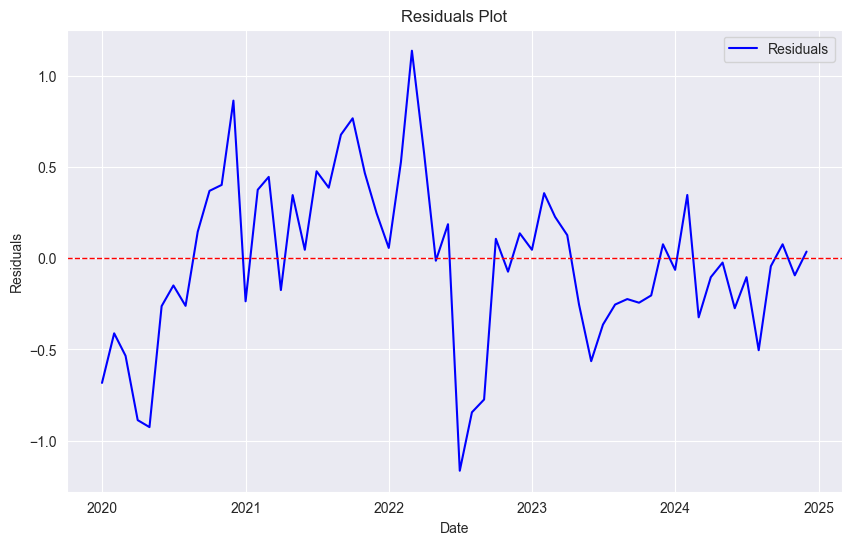

In [92]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuals', color='blue')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Residuals Plot')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.show()

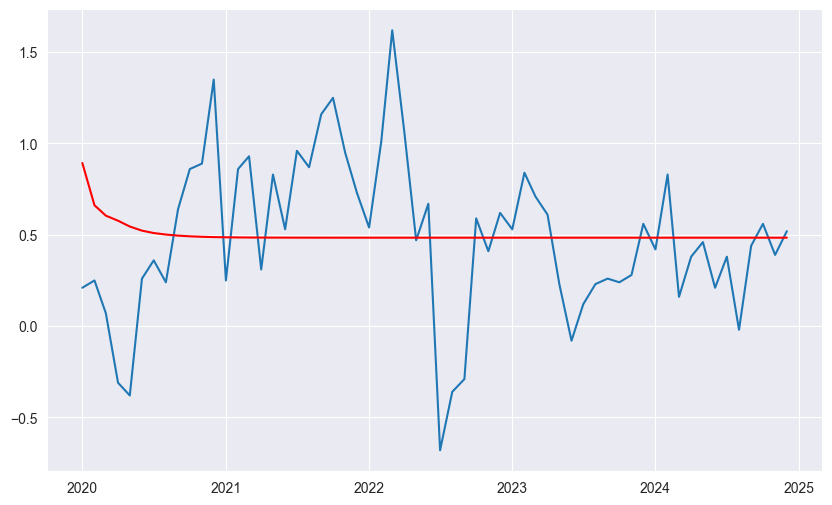

In [93]:
plt.figure(figsize=(10, 6))
plt.plot(test_data['IPCA'])
plt.plot(predictions, color='red')
plt.show()

In [126]:
from statsmodels.tsa.stattools import ccf

ccf_result = ccf(df['Dolar'], df['IGPM'], adjusted=True)

C:\Users\fabio\AppData\Local\Temp\ipykernel_8880\2658728155.py:3: FutureWarning: the 'unbiased' keyword is deprecated, use 'adjusted' instead.
  ccf_result = ccf(df['Dolar'], df['IGPM'], adjusted=True, unbiased=True)


TypeError: Can only specify 'unbiased' or 'adjusted', not both.

In [124]:
ccf_result

array([-0.05247989, -0.0974732 , -0.00365253, -0.06649711, -0.06615004,
       -0.00284234,  0.02100231, -0.14802325, -0.11151732, -0.12262432,
       -0.07843863, -0.0409849 , -0.11758736, -0.11389257, -0.12259388,
       -0.08590045, -0.10388756, -0.05791736, -0.05367882, -0.02262514,
       -0.02121567, -0.00075866, -0.01311921, -0.00957886,  0.01426133,
       -0.15210276, -0.07334877, -0.02457886, -0.06018485, -0.02330387,
        0.04595284, -0.03474129, -0.08801686, -0.13897907, -0.11512362,
       -0.08412466, -0.03849329,  0.05373788,  0.11799619, -0.0158187 ,
       -0.02304912,  0.06573951, -0.05583257, -0.00152945,  0.00927191,
        0.07426716,  0.0233945 , -0.00242329,  0.07216432,  0.09738108,
        0.07061371,  0.13256587,  0.14716751,  0.05604923,  0.06930566,
        0.07596673,  0.09844283,  0.05328215,  0.06283317,  0.1152797 ,
        0.0426172 , -0.08341146, -0.03740713,  0.00290668,  0.00593512,
       -0.00370579, -0.04714074, -0.09194888, -0.0024473 , -0.01

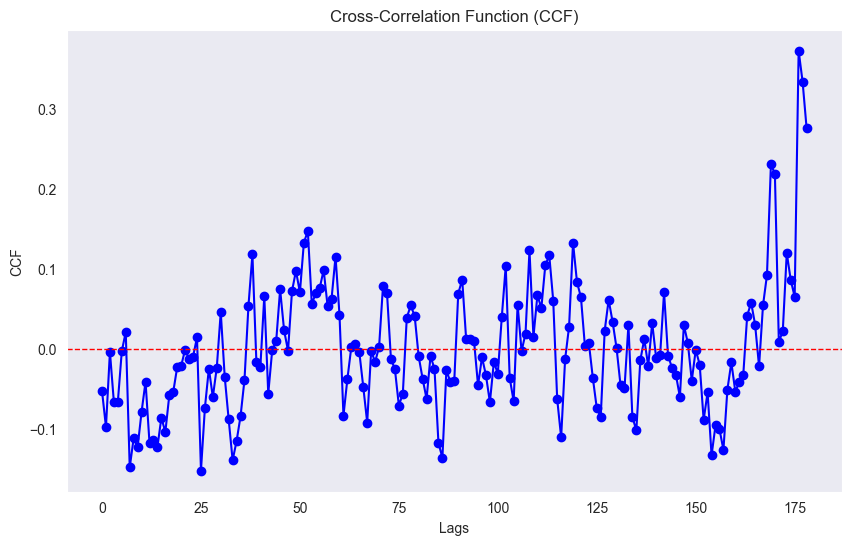

In [125]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(ccf_result)), ccf_result, marker='o', linestyle='-', color='blue')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Cross-Correlation Function (CCF)')
plt.xlabel('Lags')
plt.ylabel('CCF')
plt.grid()
plt.show()

In [129]:
from statsmodels.tsa.api import VAR
model = VAR(df[['Dolar', 'IGPM']])
lag_order = model.select_order(maxlags=36)
lag_order.summary()

,AIC,BIC,FPE,HQIC
0,3.008,3.049,20.24,3.024
1,2.429*,2.553*,11.35*,2.479*
2,2.451,2.658,11.60,2.535
3,2.503,2.793,12.22,2.621
4,2.513,2.886,12.35,2.665
5,2.548,3.003,12.78,2.733
6,2.557,3.095,12.91,2.776
7,2.519,3.140,12.43,2.771
8,2.508,3.212,12.30,2.794
9,2.562,3.349,13.00,2.882


In [130]:
from statsmodels.tsa.api import VAR
model = VAR(df[['Dolar', 'IGPM']])
var_results = model.fit(maxlags=1)
print(var_results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           ter, 29, abr, 2025
Time:                     03:04:34
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    2.35440
Nobs:                     178.000    HQIC:                   2.29064
Log likelihood:          -699.139    FPE:                    9.46080
AIC:                      2.24715    Det(Omega_mle):         9.14978
--------------------------------------------------------------------
Results for equation Dolar
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const            1.122881         0.411934            2.726           0.006
L1.Dolar        -0.041341         0.075119           -0.550           0.582
L1.IGPM         -0.492920         0.373208           -1.321           0.187

Res

In [132]:
gct = grangercausalitytests(df[['Dolar', 'IGPM']], maxlag=36)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7444  , p=0.1883  , df_denom=175, df_num=1
ssr based chi2 test:   chi2=1.7743  , p=0.1828  , df=1
likelihood ratio test: chi2=1.7655  , p=0.1839  , df=1
parameter F test:         F=1.7444  , p=0.1883  , df_denom=175, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.4219  , p=0.2441  , df_denom=172, df_num=2
ssr based chi2 test:   chi2=2.9264  , p=0.2315  , df=2
likelihood ratio test: chi2=2.9025  , p=0.2343  , df=2
parameter F test:         F=1.4219  , p=0.2441  , df_denom=172, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.2236  , p=0.3028  , df_denom=169, df_num=3
ssr based chi2 test:   chi2=3.8228  , p=0.2812  , df=3
likelihood ratio test: chi2=3.7819  , p=0.2860  , df=3
parameter F test:         F=1.2236  , p=0.3028  , df_denom=169, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.9869  , p=0.4163  

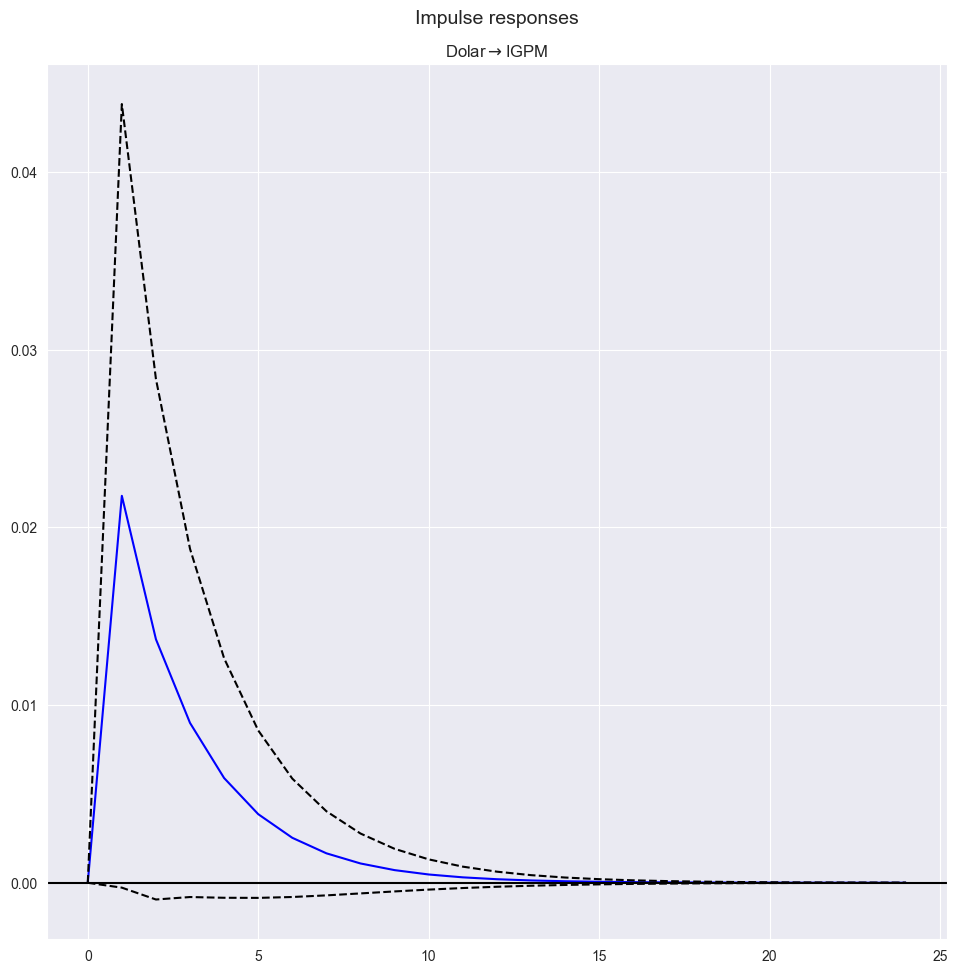

In [136]:
irf = var_results.irf(24)
irf.plot(impulse='Dolar', response='IGPM')
plt.show()

In [137]:
# Extrair os valores de resposta
irf_values = irf.orth_irfs  # matriz [horizonte, variáveis]

# Pegar só a resposta do IGPM ao choque no Dólar
# A ordem das variáveis segue o que foi passado no modelo (['Dolar', 'IGPM'])
# Então: eixo 1: impulso, eixo 2: resposta
dolar_index = 0  # impulso em Dólar
igpm_index = 1   # resposta no IGPM

# Respostas do IGPM a choques no Dólar
response_igpm_to_dolar = irf_values[:, dolar_index, igpm_index]

# Mostrar os valores
for month, value in enumerate(response_igpm_to_dolar):
    print(f"Mês {month}: {value:.5f}")

Mês 0: 0.00000
Mês 1: -0.33165
Mês 2: -0.20872
Mês 3: -0.13699
Mês 4: -0.08976
Mês 5: -0.05881
Mês 6: -0.03854
Mês 7: -0.02525
Mês 8: -0.01655
Mês 9: -0.01084
Mês 10: -0.00711
Mês 11: -0.00466
Mês 12: -0.00305
Mês 13: -0.00200
Mês 14: -0.00131
Mês 15: -0.00086
Mês 16: -0.00056
Mês 17: -0.00037
Mês 18: -0.00024
Mês 19: -0.00016
Mês 20: -0.00010
Mês 21: -0.00007
Mês 22: -0.00004
Mês 23: -0.00003
Mês 24: -0.00002


In [109]:
fevd = var_results.fevd(24)
fevd.summary()

FEVD for Dolar
         Dolar      IPCA
0     1.000000  0.000000
1     0.992050  0.007950
2     0.989948  0.010052
3     0.977965  0.022035
4     0.976074  0.023926
5     0.975815  0.024185
6     0.961819  0.038181
7     0.961517  0.038483
8     0.960952  0.039048
9     0.957952  0.042048
10    0.955950  0.044050
11    0.921694  0.078306
12    0.900576  0.099424
13    0.896046  0.103954
14    0.893926  0.106074
15    0.893126  0.106874
16    0.891800  0.108200
17    0.880520  0.119480
18    0.880036  0.119964
19    0.879983  0.120017
20    0.877611  0.122389
21    0.877430  0.122570
22    0.875071  0.124929
23    0.875163  0.124837

FEVD for IPCA
         Dolar      IPCA
0     0.000186  0.999814
1     0.008314  0.991686
2     0.013979  0.986021
3     0.017425  0.982575
4     0.059271  0.940729
5     0.070016  0.929984
6     0.083069  0.916931
7     0.097861  0.902139
8     0.136096  0.863904
9     0.138134  0.861866
10    0.135093  0.864907
11    0.133927  0.866073
12    0.131382  0.86

In [110]:
from statsmodels.tsa.stattools import coint

cointegration_results = {}
for col in df.columns:
    if col != 'Dolar':  # Assuming 'Dolar' is the base variable for cointegration tests
        score, p_value, _ = coint(df['Dolar'], df[col])
        cointegration_results[col] = {'p-value': p_value, 'Cointegrated': p_value < 0.05}

cointegration_results

{'IBOVESPA': {'p-value': np.float64(1.0767274447802212e-25),
  'Cointegrated': np.True_},
 'IPCA': {'p-value': np.float64(5.620278626165809e-25),
  'Cointegrated': np.True_},
 'IGPM': {'p-value': np.float64(7.830162540681354e-25),
  'Cointegrated': np.True_},
 'IGPDI': {'p-value': np.float64(7.665159498988886e-25),
  'Cointegrated': np.True_},
 'IGP10': {'p-value': np.float64(7.131047939426606e-25),
  'Cointegrated': np.True_},
 'INPC': {'p-value': np.float64(5.8940209510656255e-25),
  'Cointegrated': np.True_}}